# 1.	Perform a complete data inspection including – (20 marks)
a.	Outliers, Missing Data Treatment
b.	Descriptive Statistics of each variable (Eg. Boxplot, Histogram etc.)
c.	Visualization of all continuous variables


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Missing values before treatment:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing values after treatment:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS  

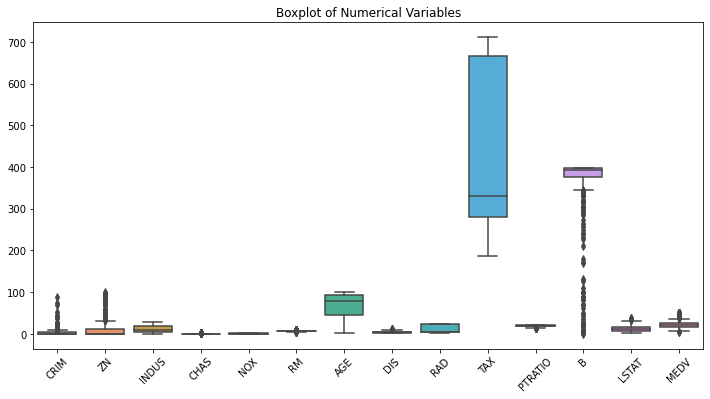

<Figure size 864x576 with 0 Axes>

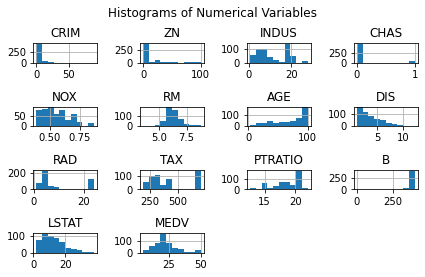

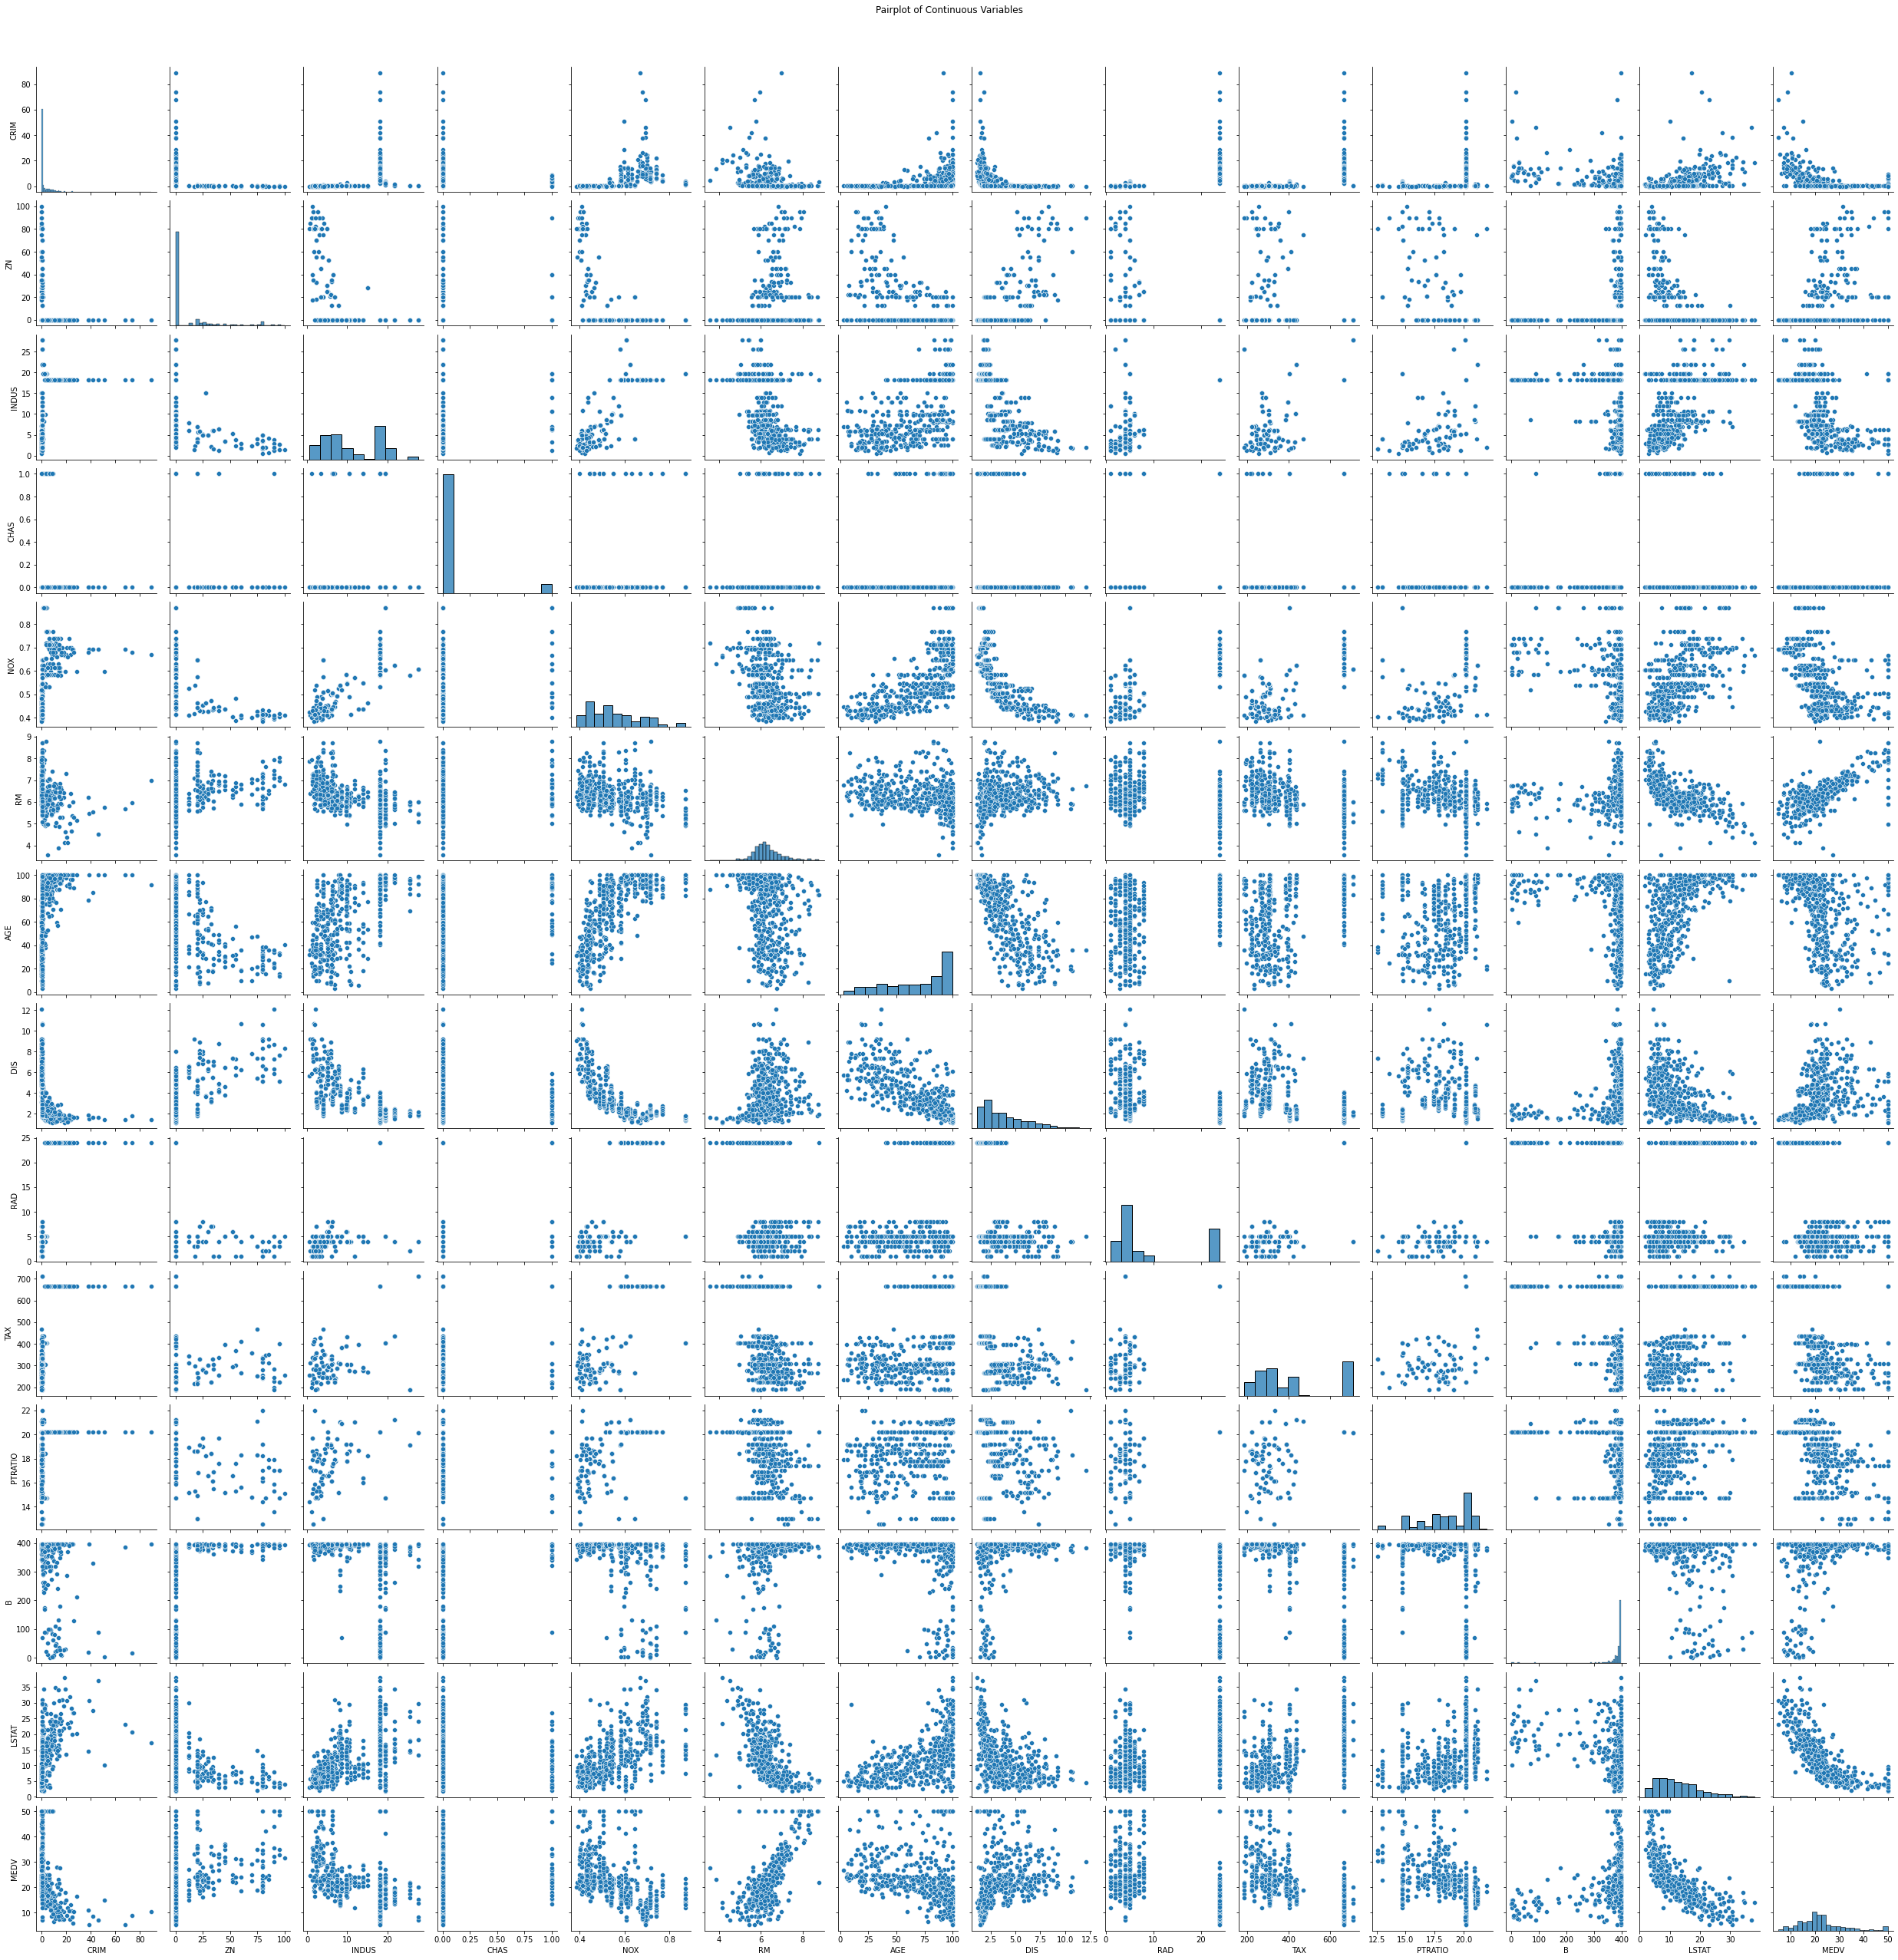

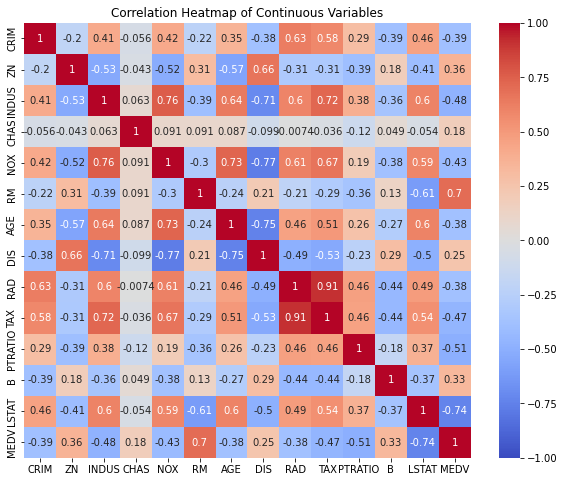

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset_Day5.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())

# Display initial information about missing values
print("Missing values before treatment:")
print(df.isnull().sum())
# Since there are no missing values, this step will not change anything,
# but we'll include it for completeness.

# Fill missing numerical values with median
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Display information after treatment
print("\nMissing values after treatment:")
print(df.isnull().sum())

# Boxplot of numerical variables to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Histograms for numerical variables
plt.figure(figsize=(12, 8))
df[numerical_cols].hist()
1
plt.suptitle('Histograms of Numerical Variables', y=0.95)
plt.tight_layout()
plt.show()

# Select continuous variables (assuming they are numeric)
continuous_cols = df.select_dtypes(include='number').columns

# Pairplot to visualize relationships between continuous variables
sns.pairplot(df[continuous_cols])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

# Correlation heatmap for continuous variables
plt.figure(figsize=(10, 8))
corr_matrix = df[continuous_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# 2.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘RM’. (10 marks)
a.	Share the model performance metrics and print the full regression model with coefficients.
b.	Use the model to predict the price of the house for ‘RM’ = 7


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load your dataset
file_path = 'Dataset_Day5.csv'
df = pd.read_csv(file_path)

# Selecting columns 'RM' and 'MEDV'
X = df[['RM']].values # Independent variable as numpy array
y = df['MEDV'].values # Dependent variable as numpy array

# Splitting the dataset into training and testing sets
6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Model performance metrics
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Model Performance Metrics:")
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Print the full regression model with coefficients
print("\nRegression Model:")
print(f"y = {model.intercept_} + {model.coef_[0]} * RM")

# Use the model to predict the price of the house for RM = 7
rm_new = np.array([[7]]) # New data point with RM = 7
predicted_price = model.predict(rm_new)[0]
print("\nPredicted house price for RM = :", predicted_price)


Model Performance Metrics:
R-squared: 0.48851413530919574
Mean Squared Error: 49.40663443770935

Regression Model:
y = -33.1070369724053 + 8.880047132048444 * RM

Predicted house price for RM = : 29.053292951933813


# 3.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘DIS’. (10 marks)
a.	Share the model performance metrics and print the full regression model with coefficients.
b.	Use the model to predict the price of the house for ‘DIS’ = 15


In [4]:
# Use the model to predict the house price for DIS = 15
dis_new = np.array([[15]]) # New data point with DIS = 15
predicted_price = model.predict(dis_new)[0]
print("\nPredicted house price for DIS :", predicted_price)


Predicted house price for DIS : 100.09367000832137
